In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# READ GALAXY ID'S, MAGNITUDES AND MAGNITUDE ERRORS FROM FILE

# mags and errors
f = 'mags_ngvsFull.txt'
data = np.genfromtxt(f)

# id's
ngvsId_1 = np.genfromtxt(f, dtype = 'S27', usecols = 0)

mags = np.zeros([data.shape[0], 5]) - 100.
magErrs = np.zeros([data.shape[0], 5]) - 100.

for i in range(data.shape[0]):
    if data[i, 1] > 0.:
        mags[i, :] = data[i, 1:10:2]
        magErrs[i, :] = data[i, 2:11:2]
    elif data[i, 11] > 0.:
        mags[i, :] = data[i, 11::2]
        magErrs[i, :] = data[i, 12::2]
        

In [3]:
# READ MAGNITUDES AND ESTIMATES OF SKY UNCERTAINTIES AND ERRORS FROM FILE

f = 'skyErrorEstimates_stdDev.txt'
data = np.genfromtxt(f)

#mags = data[:, 5]
#skyErr = data[:, 6:]
#skySigmas = data[:, 4]

totErr = data[:, 10]

#---

ngvsId_2 = np.genfromtxt(f, dtype = 'S', usecols = [0])

#---

bands = np.genfromtxt(f, dtype = 'S', usecols = [1])

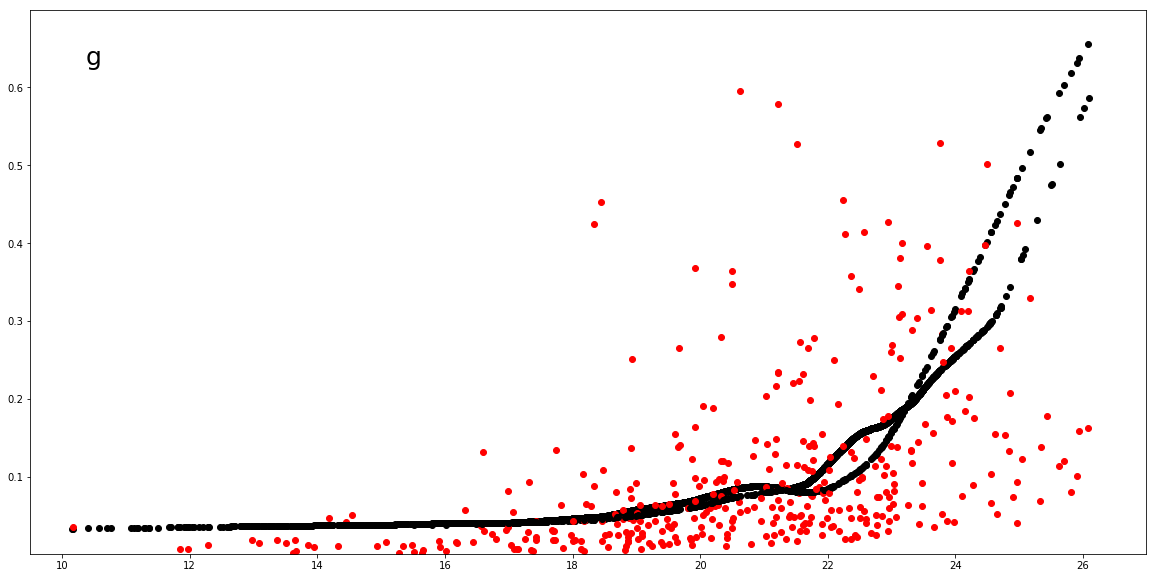

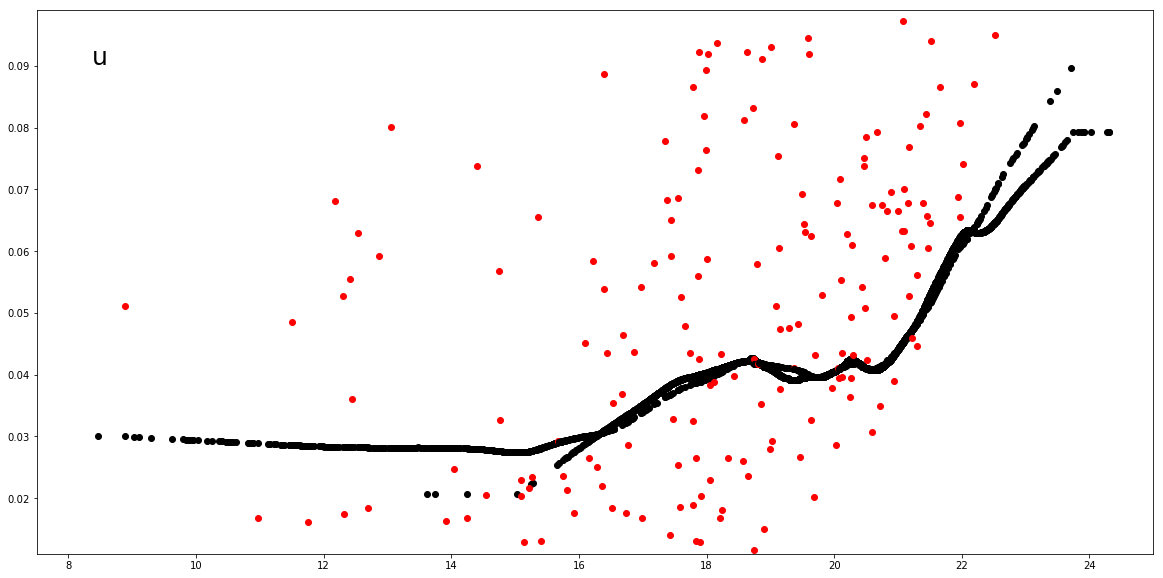

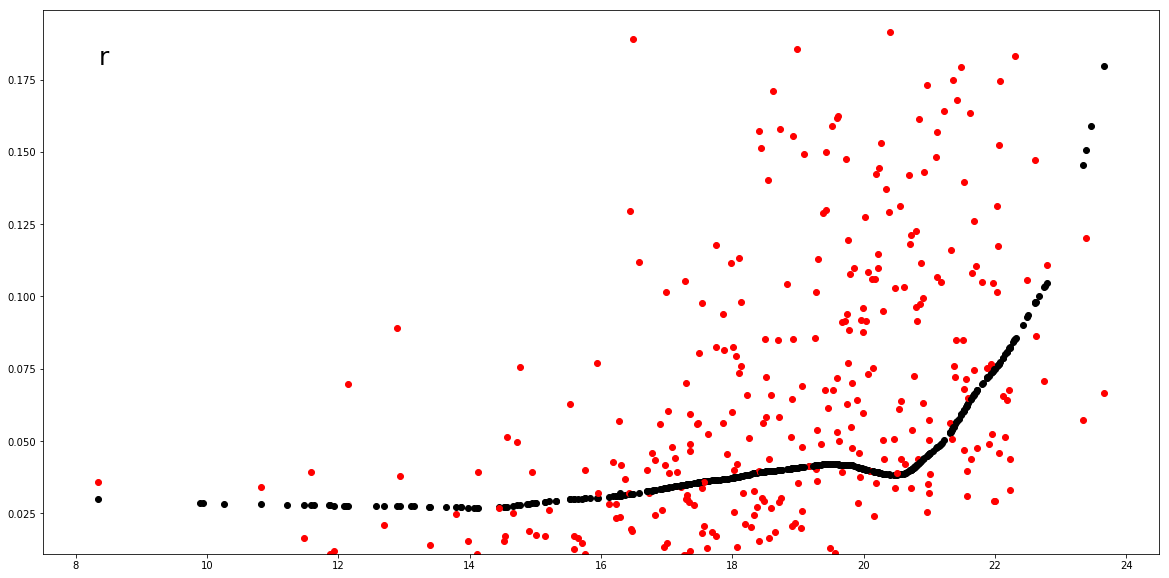

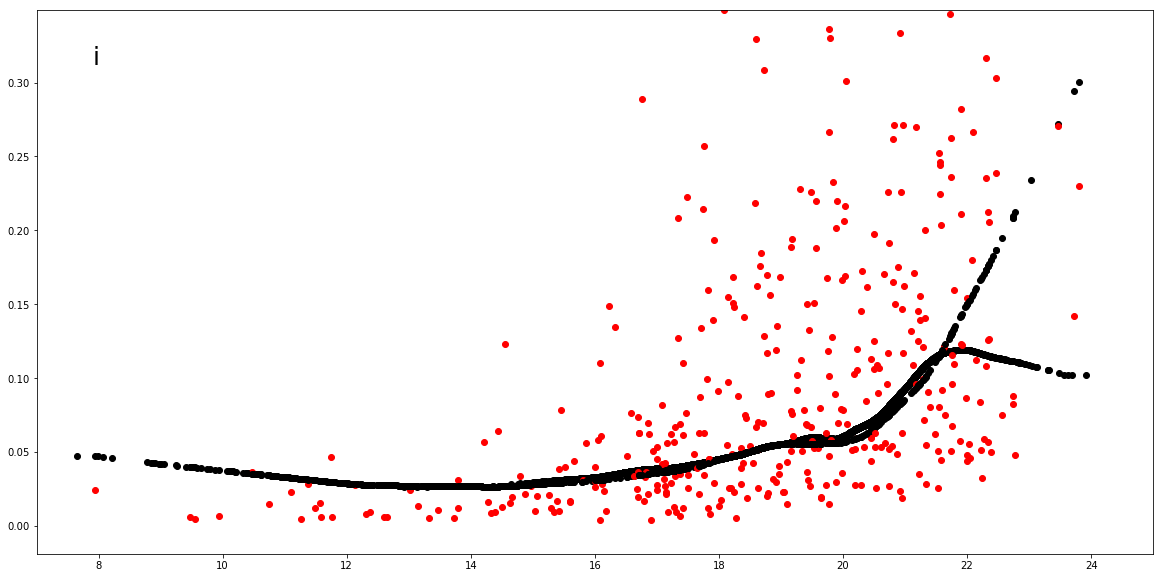

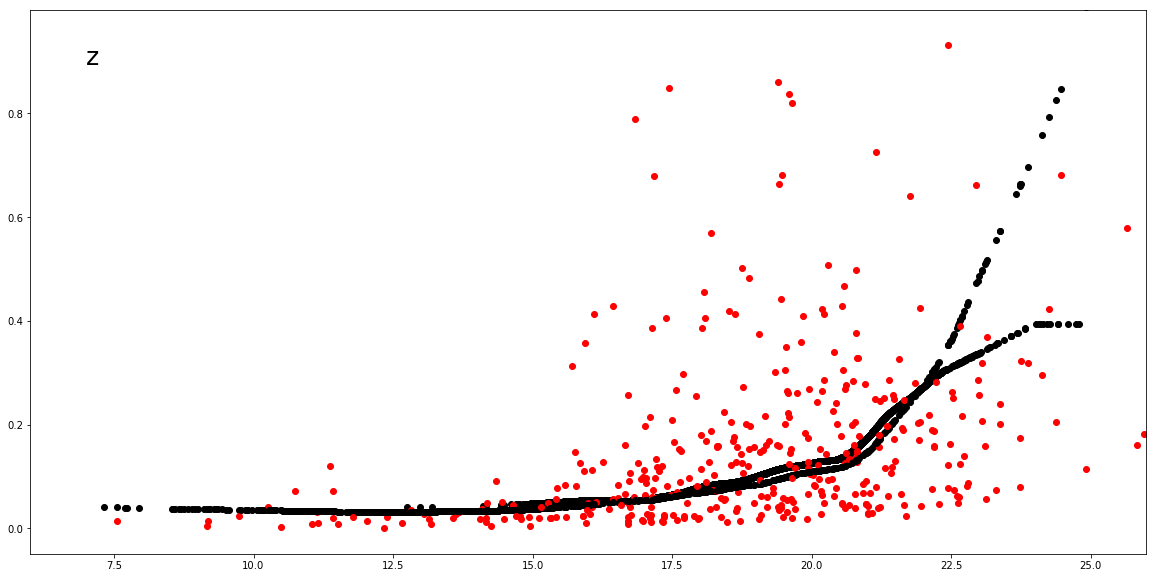

In [4]:
xlims = [[9.50, 26.99], [7.50, 24.99], [7.50, 24.50], [7.00, 24.99], [6.00, 25.99]]
ylims = [[0.001, 0.699], [0.011, 0.099], [0.011, 0.199], [-0.019, 0.349], [-0.049, 0.999]]

arr = np.stack([ngvsId_2, bands], axis = 1)

for j, band in enumerate([b'G', b'U', b'R', b'I', b'Z']):
    # create new plot
    fig = plt.figure(figsize = [20, 10])
    ax1 = plt.subplot(111)
    
    for i, Id in enumerate(ngvsId_1):
        ax1.scatter(mags[i, j], magErrs[i, j], c = 'k')
        
        condition = (arr[:, 0] == Id) & (arr[:, 1] == band)
        idx = np.where(condition)
        if len(idx[0]) > 0:
            ax1.scatter(mags[i, j], totErr[idx][0], c = 'r')
            
    ax1.set_xlim(xlims[j])
    ax1.set_ylim(ylims[j])
    
    x = ax1.get_xlim()[0] + 0.05 * (ax1.get_xlim()[1] - ax1.get_xlim()[0])
    y = ax1.get_ylim()[1] - 0.10 * (ax1.get_ylim()[1] - ax1.get_ylim()[0])
    plt.text(x, y, str(band, 'utf-8').lower(), fontsize = 25)
    
    plt.savefig('magErrorVsSkyError_' + str(band, 'utf-8').lower() +'.pdf')